In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset contains various queries and their associated URLs with relevance judgement
labels as relevance scores.
To complete this task, focus only on the queries with qid:4 and use the relevance judgement
labels as the relevance score.


**The first objective** is to


*    create a file that rearranges the query-url pairs in order of the maximum DCG (discounted cumulative gain)
*   The number of such files that could be made should also be
stated.

**Second objective**


*   compute the nDCG (normalized discounted cumulative gain) for the dataset. This involves
calculating nDCG at position 50 and for the entire dataset.


**The third objective**


*   assume a model that ranks URLs based on the value of feature 75,
which represents the sum of TF-IDF on the whole document. URLs with higher feature 75
values are considered more relevant. Any non-zero relevance judgement value is considered
relevant.



**Fourth objective**

Using this model, plot a Precision-Recall curve for the query "qid:4".
The curve should help visualize the trade-off between precision and recall as the model's
threshold for relevance is adjusted.

##Pre-processing

###Importing libraries

In [1]:
#importing libraries

import pandas as pd
import math

from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

###Loading the data and Preprocessing

In [2]:
#/content/drive/MyDrive/IR_A2_98/IR-assignment-2-data (2).txt
df = pd.read_csv("/content/drive/MyDrive/CSE508_Winter2023_A2_98/IR-assignment-2-data (2).txt", sep=" ")
#/content/drive/MyDrive/CSE508_Winter2023_A2_98/IR-assignment-2-data (2).txt

In [3]:
df.shape

(239092, 139)

In [4]:
df.head()

,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,Unnamed: 138
0,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
3,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
4,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,NaN


In [5]:
#adding column names to the dataframe

#column names
column_names = ['relevance_judgements','qid']
for i in range(1,138):
  column_names.append(str(i))

#column_names

df.columns = column_names

In [6]:
df.head()

,relevance_judgements,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
3,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
4,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,NaN


In [7]:
df['qid']

0             qid:4
1             qid:4
2             qid:4
3             qid:4
4             qid:4
            ...    
239087    qid:29989
239088    qid:29989
239089    qid:29989
239090    qid:29989
239091    qid:29989
Name: qid, Length: 239092, dtype: object

In [8]:
df[df['qid'] == 'qid:4']

,relevance_judgements,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
3,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
4,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
98,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
99,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
100,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


###Extracting the first two columns, i.e 'relevence_judgement' score and 'qid'

In [9]:

df2 = df[['relevance_judgements','qid']].copy()
print(df2.head())


   relevance_judgements    qid
0                     0  qid:4
1                     0  qid:4
2                     0  qid:4
3                     1  qid:4
4                     0  qid:4


###Formatting qid column

In [10]:
df2['qid'].unique()

array(['qid:4', 'qid:19', 'qid:34', ..., 'qid:29959', 'qid:29974',
       'qid:29989'], dtype=object)

In [11]:

qid =[]
for ele in range(df2.shape[0]):
  temp = df2['qid'][ele].split(':',1)
  if(len(temp)>1):
    qid.append(int(temp[1]))
  else:
    qid.append(int(temp[0]))
  

In [12]:
#function to format a given column

def format_column(values):
  formatted_values =[]
  for ele in range(len(values)):
    temp = values[ele].split(':',1)
    if(len(temp)>1):
      formatted_values.append(float(temp[1]))
    else:
      formatted_values.append(float(temp[0]))

  return formatted_values

In [13]:
type(list(df['75']))
print(df['75'][:10])

0    75:538.388954
1     75:88.171761
2    75:144.564444
3    75:142.589323
4    75:463.099129
5    75:103.400313
6    75:411.010633
7    75:972.826451
8    75:142.589323
9     75:84.625987
Name: 75, dtype: object


In [14]:
x = format_column(list(df['75']))

print(x[0:10])

[538.388954, 88.171761, 144.564444, 142.589323, 463.099129, 103.400313, 411.010633, 972.826451, 142.589323, 84.625987]


In [15]:
df2['qid'] = qid

df2.head()

,relevance_judgements,qid
0,0,4
1,0,4
2,0,4
3,1,4
4,0,4


###Rows with qid = 4

In [16]:
df_qid_4 = df2[df2['qid'] == 4]

print(df_qid_4.head())
print(df_qid_4.shape)

   relevance_judgements  qid
0                     0    4
1                     0    4
2                     0    4
3                     1    4
4                     0    4
(102, 2)


##TASK 1 : Calculate DCG

In [17]:
#function to calculate DCG

def dcg(curr_list):
  dcg_list = []
  
  dcg_list.append(curr_list[0])
  for i in range(2,len(curr_list)+1):
    # temp = curr_list[i-1]/( math.log2(i) )
    temp = curr_list[i-1]/( math.log(i,2) )
    dcg_list.append(temp)

  #print(dcg_list)
  return sum(dcg_list)


# print(dcg([3, 2, 3, 0, 0, 1, 2, 2, 3, 0]))

In [18]:
#calculating DCG for documents retrieved for qid:4
dcg_qid_4 = dcg(df_qid_4['relevance_judgements'])

print(df_qid_4['relevance_judgements'])

print("DCG for the retrieved items for qid=4 :",dcg_qid_4)


0      0
1      0
2      0
3      1
4      0
      ..
97     0
98     1
99     2
100    1
101    0
Name: relevance_judgements, Length: 102, dtype: int64
DCG for the retrieved items for qid=4 : 12.818633011228554


In [67]:

import numpy as np
ground_truth_qid4 = list(df_qid_4['relevance_judgements'])
ground_truth_qid4.sort(reverse = True)
np.unique(ground_truth_qid4)


1

In [20]:
#calculate the max_dcg 

max_dcg_qid4 = dcg(ground_truth_qid4)

print("The maximum dcg for all the query-url pairs with qid = 4: ",max_dcg_qid4)

The maximum dcg for all the query-url pairs with qid = 4:  20.989750804831445


### Creating a file that rearranges the query-url pairs in order of the maximum DCG

In [68]:
# ground_truth_all = list(df_qid_4['relevance_judgements'])
# ground_truth_all.sort(reverse = True)
# len(counts)
ground_truth_qid4 = list(df_qid_4['relevance_judgements'])
ground_truth_qid4.sort(reverse = True)
np.unique(ground_truth_qid4)

array([0, 1, 2, 3])

In [69]:
# Saving the contents in a file

file = open('max_DCG_arrangement.txt','w')
for item in ground_truth_qid4:
  file.write(str(item)+"\n")
file.close()

### The number of such files that could be made

In [70]:
def fact(num):
  if(num==1):
    return 1
  return num * fact(num-1)

fact(4)

24

In [71]:


# Count the frequency of each unique value in ground truth
unique_val = np.unique(ground_truth_qid4)
counts =[]

for val in unique_val:
  counts.append(ground_truth_qid4.count(val))

counts

[58, 26, 17, 1]

In [75]:
# Calculating the number of files that can be created with max_dcg value

number_of_files = 1

for val in counts:
  number_of_files *= fact(val)

print("The total number of files with maximum DCG are:\n",number_of_files)


The total number of files with maximum DCG are:
 337177921626074077963153349405175082998929494416382552342460683266184033774494804786655704498831360000000000000000000000


##TASK 2 : Calclate NDCG




In [21]:
#function to calculate NDCG
def ndcg(ground_truth,curr_list):
  dcg_curr = dcg(curr_list)
  dcg_gt = dcg(ground_truth)
  #print("dcg(curr_list)",dcg_curr)
  #print("dcg(ground_truth)",dcg_gt)
  return dcg_curr/dcg_gt

# print()
# print("nDCG for the retrieved items for qid=4 :",ndcg([2,2,1,0],[2,1,2,0]))

In [22]:
# Calculating nDCG for documents retrieved for qid:4
ground_truth = list(df_qid_4['relevance_judgements'])
ground_truth.sort(reverse = True)
curr_list = list (df_qid_4['relevance_judgements'])
ndcg_qid_4 = ndcg(ground_truth,curr_list)

ndcg_qid_4
print("nDCG for the retrieved items for qid=4 :",ndcg_qid_4)

nDCG for the retrieved items for qid=4 : 0.6107091565983692


In [23]:
print(curr_list)
print(ground_truth)

[0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]
[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Calculating nDCG at 50

In [24]:

rel_judegments_50 = list(df_qid_4['relevance_judgements'][:50])
ground_truth_50 = list(df_qid_4['relevance_judgements'])
ground_truth_50.sort(reverse = True)

ndcg_qid_4_50 = ndcg(ground_truth_50[:50], list(df_qid_4['relevance_judgements'][:50]))


print("nDCG at 50 for the retrieved items for qid=4 :",ndcg_qid_4_50)

nDCG at 50 for the retrieved items for qid=4 : 0.3640785689530492


In [25]:
print(sum(rel_judegments_50))

31


In [26]:
print(ground_truth_50)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##TASK 3 : Plot Precision Recall Curve

###Formatting feature-75

In [27]:
# Extracting all rows from original dataset where qid=4
df4 = df[df2['qid'] == 4]

df4.head()

,relevance_judgements,qid,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
3,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
4,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,NaN


In [28]:
feature75_with_qid4 = format_column(df4['75'])

print(feature75_with_qid4[:10])
print(len(feature75_with_qid4))

[538.388954, 88.171761, 144.564444, 142.589323, 463.099129, 103.400313, 411.010633, 972.826451, 142.589323, 84.625987]
102


###Find binary relevance

In [38]:
#function to find binary relavance

def find_relevance(values):
  rel_list = []

  for i in range(len(values)):
    if(values[i]>0):
      rel_list.append(1)

    else:
      rel_list.append(0)

  return rel_list


In [39]:
# Calculating relavance of feature 75 and relevance_judgements, i.e y_pred and y_true

y_pred = find_relevance(feature75_with_qid4)
y_true = find_relevance(list(df_qid_4['relevance_judgements']))

print(y_pred[:10])
print(y_true[:10])

print(len(y_true),len(y_pred))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
102 102


In [31]:
# # method 1
# from sklearn.metrics import PrecisionRecallDisplay

# display = PrecisionRecallDisplay.from_estimator(
#     classifier, X_test, y_test, name="LinearSVC"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

# #ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [40]:
# count the actual true labels
true_count=0
for val in y_true:
  if val ==1:
    true_count +=1

true_count

44

In [44]:
# calculate precision and recall based on y_true and y_pred
precision_val = []
true_count_pred =0
recall_val = []

for i in range(len(y_true)):
  if(y_true[i] ==1):
      true_count_pred +=1
  precision_val.append(true_count_pred/(i+1))
  recall_val.append(true_count_pred/true_count)

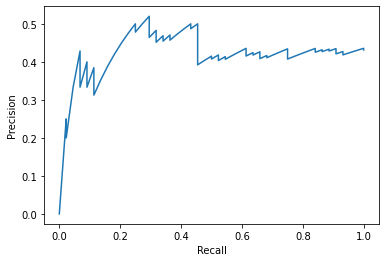

In [49]:
# plot thr precision recall curve

plt.plot(recall_val,precision_val)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()